In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import tabulate

from os.path import join
from comm_data import preprocess

import sys
sys.path.append("..")
from seal.trainer.communication import *

RESULTS_DIR = "smartcomp-results"
HUE_ORDER = ["Federated", "Centralized", "Decentralized"]
STYLE_ORDER = ["Federated", "Centralized", "Decentralized"]
plt.style.use(["science", "ieee", "no-latex"])
warnings.simplefilter("ignore")

In [4]:
base_path = ("..", "out", "data")
dfs = []
for intersection in ["grid-3x3", "grid-5x5", "grid-7x7"]:
    for ranked in [False]:
        ranked_str = "ranked" if ranked else "unranked"
        for aggr_fn in ["naive-aggr", "pos-reward-aggr"]:
            path = join(*base_path, "FedRL", intersection, f"v4_{aggr_fn}_{ranked_str}.csv")
            temp_df = preprocess(path, intersection=intersection)
            temp_df["aggr_fn"] = aggr_fn
            dfs.append(temp_df)

data = pd.concat(dfs)
data.reset_index(inplace=True)
data.replace({"grid-3x3": "Grid-3x3", "grid-5x5": "Grid-5x5", "grid-7x7": "Grid-7x7"}, inplace=True)
INTERSECTIONS = data["intersection"].unique().tolist()
data.head()

,index,veh-to-tls-info-comms,tls-to-edge-obs-comms,edge-to-tls-rank-comms,edge-to-tls-action-comms,edge-to-tls-policy-comms,tls-to-edge-policy-comms,trainer,iteration,round,intersection,timesteps_total,ranked,weight_aggr_fn,episode_reward_mean,episode,total_comm_cost,tls,aggr_fn
0,0,977,0,0,0,0,0,Federated,1,0,Grid-3x3,4000,False,naive,-9.836773,0,977,A0,naive-aggr
1,1,987,0,0,0,0,0,Federated,1,0,Grid-3x3,4000,False,naive,-9.836773,0,987,C2,naive-aggr
2,2,846,0,0,0,0,0,Federated,1,0,Grid-3x3,4000,False,naive,-9.836773,0,846,A1,naive-aggr
3,3,1163,0,0,0,0,0,Federated,1,0,Grid-3x3,4000,False,naive,-9.836773,0,1163,B0,naive-aggr
4,4,972,0,0,0,0,0,Federated,1,0,Grid-3x3,4000,False,naive,-9.836773,0,972,B1,naive-aggr


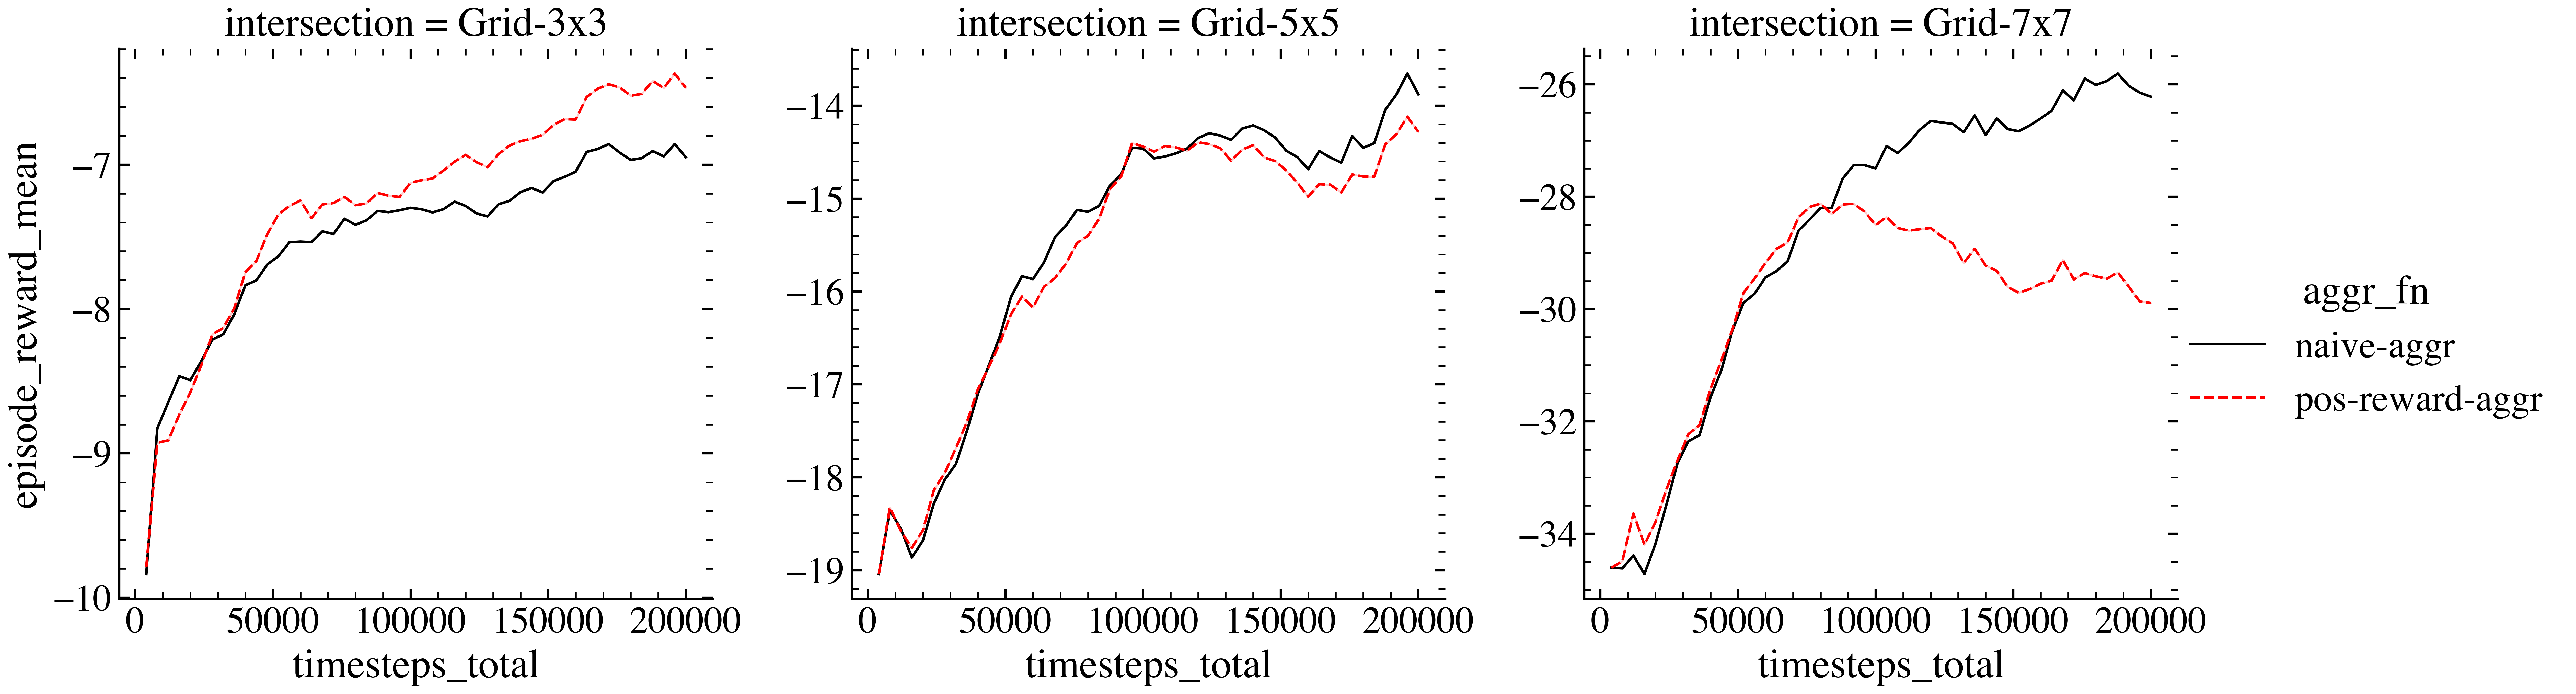

In [7]:
with sns.plotting_context("paper", font_scale=2):
    sns.relplot(
        data=data, kind="line",
        col="intersection",
        x="timesteps_total", y="episode_reward_mean",
        hue="aggr_fn", style="aggr_fn",
        facet_kws={"sharey": False}
    )
    plt.show()